In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Dense , Dropout
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading Dataset

mnist = keras.datasets.mnist

In [3]:
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

print(x_train.shape , x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [4]:
# Data Preprocessing 
# Reshaping the data to include a channel dimension (for grayscale)
#(samples,height,width,channels)

x_train = x_train.reshape(60000, 28, 28 ,1)
x_test = x_test.reshape(10000, 28, 28 ,1)

In [5]:
# Normalizing the pixel values ([0,255] -> [0,1])

x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [6]:
# One-hot encoding labels

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [7]:
print("Training data shape: ", x_train.shape)
print("Test data shape: ", x_test.shape)

print("\nExample one-hot encoded label for y_train: ", y_train[0])
print("Example one-hot encoded label for y_test: ", y_test[0])

Training data shape:  (60000, 28, 28, 1)
Test data shape:  (10000, 28, 28, 1)

Example one-hot encoded label for y_train:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Example one-hot encoded label for y_test:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [20]:
#Building CNN Model


model = keras.Sequential([
                            # 1st CN Block
                            Conv2D(32, kernel_size=(3,3), activation = 'relu'
                            , input_shape = (28,28,1)),
                            MaxPooling2D(pool_size=(2,2)),
                            # 2nd CN Block
                            Conv2D(64, kernel_size=(3,3), activation = 'relu'),
                            MaxPooling2D(pool_size=(2,2)),
                            # Flats 2D Features to 1D vector
                            Flatten(),
                            # Fully connecting layers for classfication
                            Dense(128, activation = 'relu'),Dropout(0.45),

                            # Output layer (10 Neurons)
                            Dense(10, activation = 'softmax')
                        ])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Compiling model

model.compile(optimizer = 'adam' ,
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

print("Model training finished.")

Model training finished.


In [10]:
print("\nStarting Model Training...")
history = model.fit(x_train, y_train,
                    batch_size = 128,
                    epochs = 10,
                    validation_split = 0.1) # Keras uses this split for 'val_accuracy'
print("Model training finished.")


Starting Model Training...
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - accuracy: 0.9106 - loss: 0.2953 - val_accuracy: 0.9798 - val_loss: 0.0617
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9727 - loss: 0.0900 - val_accuracy: 0.9867 - val_loss: 0.0446
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9800 - loss: 0.0664 - val_accuracy: 0.9885 - val_loss: 0.0368
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9843 - loss: 0.0520 - val_accuracy: 0.9905 - val_loss: 0.0367
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9867 - loss: 0.0441 - val_accuracy: 0.9902 - val_loss: 0.0316
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9886 - loss: 0.0379 - val_accuracy: 0.9910 - val_loss: 0.0339
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9893 - loss: 0.0346 - val_accuracy: 0.9907 - val_loss: 0.0341
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accura

In [ ]:
from sklearn.metrics import classification_report

In [12]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'\nTest Accuracy: {accuracy * 100:.2f}%')
print(f'Test Loss: {loss:.4f}')



Test Accuracy: 99.16%
Test Loss: 0.0249


In [13]:
# Generate predictions to create a classification report
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [14]:
# Convert one-hot encoded y_test back to original labels for the report
y_true_classes = np.argmax(y_test, axis=1)

In [15]:
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes))
# print(confusion_matrix(y_true_classes, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



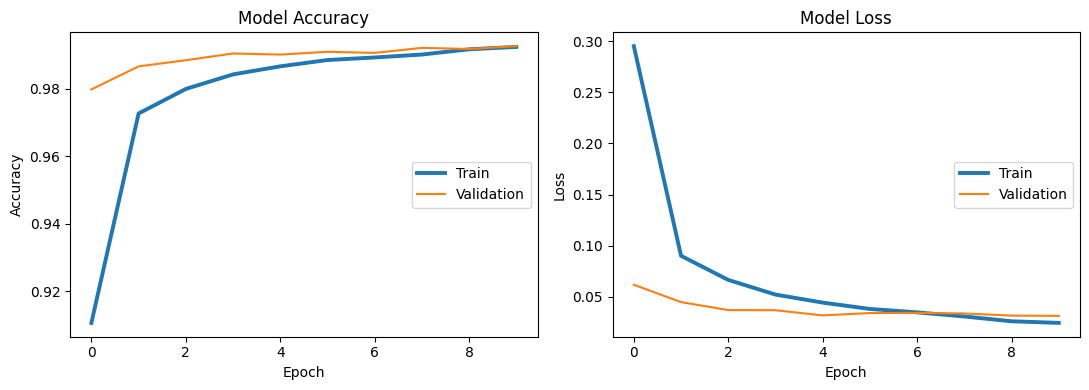

In [16]:
# --- Plotting Results ---
plt.figure(figsize=(11, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'],linewidth=2.8)
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='center right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'],linewidth=2.8)
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='center right')

plt.tight_layout()
plt.show()



Random indexes from test set:  [3566 9036 7646 8788 9277 2949 9662 8205]


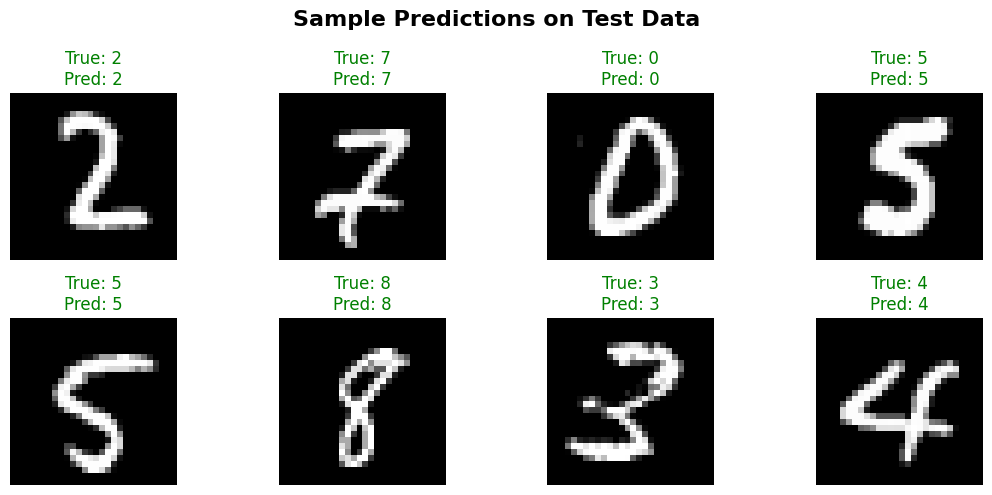

In [17]:
# Select 8 random images from the test set to visualize predictions
rand_indexes = np.random.randint(0, x_test.shape[0], 8)
print("\nRandom indexes from test set: ", rand_indexes)

plt.figure(figsize=(11, 5))
plt.suptitle('Sample Predictions on Test Data', fontweight='bold', fontsize=16)

for i, index in enumerate(rand_indexes):
    # Use standard NumPy indexing and reshape the image
    img = x_test[index].reshape(28, 28)
    
    # Convert the one-hot encoded true label to an integer
    true_label = np.argmax(y_test[index])
    
    # Get the predicted label (this was already an integer)
    predicted_label = y_pred_classes[index]
    
    # Determine color of the title
    color = 'green' if true_label == predicted_label else 'red'
    
    plt.subplot(2, 4, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'True: {true_label}\nPred: {predicted_label}', color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()


Displaying some misclassified images...


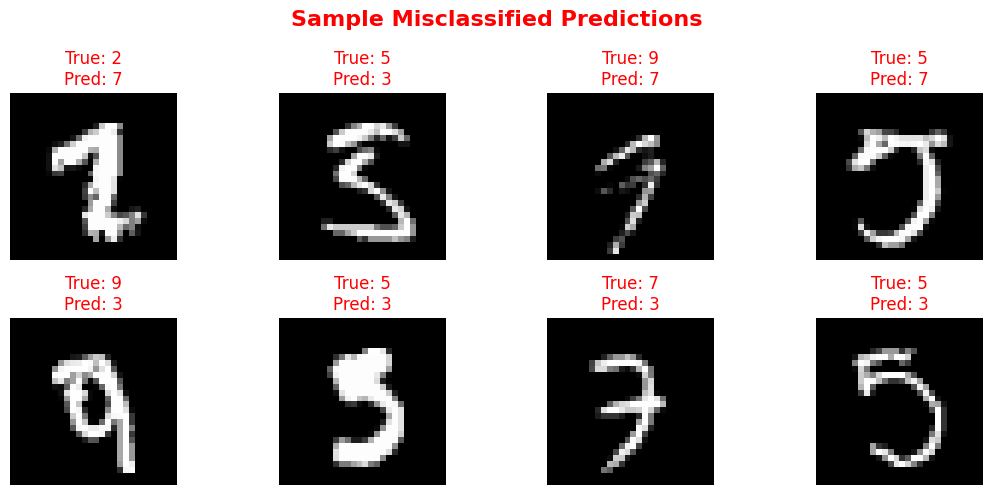

In [18]:
# --- Plotting Misclassified Images ---

# 1. Find the indices of all misclassified images
misclassified_indices = np.where(y_pred_classes != y_true_classes)[0]

# 2. Select a few random misclassified images to display
if len(misclassified_indices) > 0:
    rand_misclassified = np.random.choice(misclassified_indices, size=min(8, len(misclassified_indices)), replace=False)
    print("\nDisplaying some misclassified images...")

    plt.figure(figsize=(11, 5))
    plt.suptitle('Sample Misclassified Predictions', fontweight='bold', fontsize=16, color='red')

    for i, index in enumerate(rand_misclassified):
        img = x_test[index].reshape(28, 28)
        true_label = y_true_classes[index]
        predicted_label = y_pred_classes[index]
        
        plt.subplot(2, 4, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f'True: {true_label}\nPred: {predicted_label}', color='red')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("✅ No images were misclassified!")

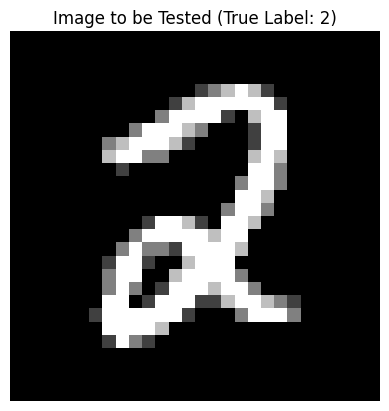

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step

Model's Prediction: 2
True Label: 2
✅ The prediction is correct!

Prediction Probabilities:
  Class 0: 0.00%
  Class 1: 0.00%
  Class 2: 100.00%
  Class 3: 0.00%
  Class 4: 0.00%
  Class 5: 0.00%
  Class 6: 0.00%
  Class 7: 0.00%
  Class 8: 0.00%
  Class 9: 0.00%


In [19]:
# 1. Select a single sample image from the test set
try:
    sample_index = int(input(f"\nEnter an index between 0 and {len(x_test)-1} to test an image: "))
    if not (0 <= sample_index < len(x_test)):
        raise ValueError
    
except ValueError:
    print("Invalid index. Using index 0 instead.")
    sample_index = 0
    
# Use standard NumPy array indexing
single_image = x_test[sample_index]
true_label = np.argmax(y_test[sample_index]) # Convert one-hot back to integer

# 2. Display the image
plt.imshow(single_image.reshape(28, 28), cmap='gray') # Reshape from (28,28,1) to (28,28) for imshow
plt.title(f"Image to be Tested (True Label: {true_label})")
plt.axis('off')
plt.show()

# 3. Preprocess the image for the model
# The model expects a batch of images, so add a dimension at the start
# Shape goes from (28, 28, 1) to (1, 28, 28, 1)
image_for_prediction = np.expand_dims(single_image, axis=0)

# 4. Make a prediction
prediction_probabilities = model.predict(image_for_prediction)
predicted_label = np.argmax(prediction_probabilities)

# 5. Display the result
print(f"\nModel's Prediction: {predicted_label}")
print(f"True Label: {true_label}")

if predicted_label == true_label:
    print("✅ The prediction is correct!")
else:
    print("❌ The prediction is incorrect.")

# Display the raw probabilities the model assigned to each class
print("\nPrediction Probabilities:")
for i, prob in enumerate(prediction_probabilities[0]):
    print(f"  Class {i}: {prob*100:.2f}%")
